# Missing Values

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
dogs = pd.read_csv("Resources\dogs.csv", index_col='date_of_birth', parse_dates=['date_of_birth'])

## Detecting missing values
When you first get a DataFrame, it's a good idea to get a sense of whether it contains any missing values, and if so, how many. That's where the `isna` method comes in. When we call `isna` on a DataFrame, we get a Boolean for every single value indicating whether the value is missing or not, but this isn't very helpful when you're working with a lot of data.

In [30]:
dogs.head(20).isna()

,name,breed,color,height_cm,weight_kg
date_of_birth,,,,,
2020-05-15,False,False,False,False,False
2018-09-01,False,False,False,False,False
2021-02-20,False,False,False,False,False
2019-11-10,False,False,False,False,False
2022-03-25,False,False,False,False,False
2017-07-07,False,False,False,False,False
2020-01-01,False,False,False,False,False
2019-04-18,False,False,False,True,False
2021-06-30,False,False,False,False,True


### Detecting any missing values
If we chain `.isna()` with `.any()`, we get one value for each variable that tells us if there are any missing values in that column. Here, we see that there's at least one missing value in the weight column, but not in any of the others.

In [31]:
dogs.isna().any()

name         True
breed        True
color        True
height_cm    True
weight_kg    True
dtype: bool

## Counting missing values
Since taking the sum of Booleans is the same thing as counting the number of Trues, we can combine `sum` with `isna` to count the number of NaNs in each column.

In [32]:
dogs.isna().sum()

name         10
breed        22
color        27
height_cm    77
weight_kg    58
dtype: int64

## Plotting missing values
We can use those counts to visualize the missing values in the dataset using a bar plot. Plots like this are more interesting when you have missing data across different variables, while here, only weights are missing.

<Axes: >

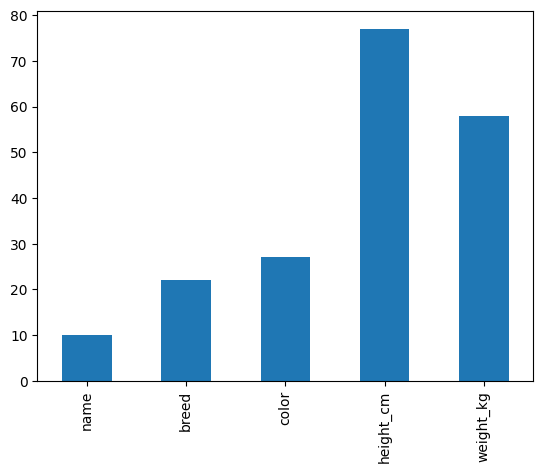

In [40]:
dogs.isna().sum().plot(kind="bar")

## What to do with missing data

### Removing missing data
One option is to remove the rows in the DataFrame that contain missing values. This can be done using the `dropna` method. However, this may not be ideal if you have a lot of missing data, since that means losing a lot of observations.


**Note**: "dogs" df had 424 entries, after using `dropna` on it, it's reduced to 278. That is A LOT of removed data.

**Note**: the `dropna` method returns a copy of the `df` with all NaNs removed. that does not affect the original `df` (in this case `dogs`)

In [ ]:
dogs.dropna()

,name,breed,color,height_cm,weight_kg
date_of_birth,,,,,
2020-05-15,Buddy,Golden Retriever,Red,60.0,30.0
2018-09-01,Lucy,Labrador,Orange,58.0,28.0
2021-02-20,Max,German Shepherd,Yellow,65.0,38.0
2019-11-10,Bella,Poodle (Standard),Green,50.0,22.0
2022-03-25,Charlie,Beagle,Blue,35.0,12.0
...,...,...,...,...,...
2022-02-20,Chloe,Shih Tzu,Orange,27.0,6.0
2018-05-30,Louie,German Shorthaired Pointer,Yellow,60.0,29.0
2021-03-29,Toby,Vizsla,Green,58.0,23.0


### Replacing missing values
Another option is to replace missing values with another value. The `fillna` method takes in a value, and all NaNs will be replaced with this value. There are also many sophisticated techniques for replacing missing values, which you can learn more about in our course about missing data.

**Note**: Similar to the `dropna` method, the `fillna` method returns a copy of the `df` with all NaNs filled with the value given to the `fillna` method. that does not affect the original `df` (in this case `dogs`)

In [59]:
dogs.fillna(0)

,name,breed,color,height_cm,weight_kg
date_of_birth,,,,,
2020-05-15,Buddy,Golden Retriever,Red,60.0,30.0
2018-09-01,Lucy,Labrador,Orange,58.0,28.0
2021-02-20,Max,German Shepherd,Yellow,65.0,38.0
2019-11-10,Bella,Poodle (Standard),Green,50.0,22.0
2022-03-25,Charlie,Beagle,Blue,35.0,12.0
...,...,...,...,...,...
2022-02-20,Chloe,Shih Tzu,Orange,27.0,6.0
2018-05-30,Louie,German Shorthaired Pointer,Yellow,60.0,29.0
2021-03-29,Toby,Vizsla,Green,58.0,23.0


In [58]:
dogs.isna().sum()

name         10
breed        22
color        27
height_cm    77
weight_kg    58
dtype: int64

# Recap

You learned about handling missing values in pandas DataFrames, a common issue in data analysis. Missing data can significantly impact your analysis, leading to incorrect conclusions if not properly managed. Here are the key points you covered:

- Identifying Missing Values: You discovered how to use the `.isna()` method to check for missing values in a DataFrame. This method returns a DataFrame of Booleans indicating the presence of missing values.

- Summarizing Missing Values: You learned to apply `.any()` and `.sum()` methods after `.isna()` to identify columns with missing values and count them, respectively. This is crucial for understanding the extent of missing data.

- Visualizing Missing Data: Through a practical example, you visualized missing values using a bar plot. This visual representation helps in quickly identifying the columns with the most significant number of missing values.

- Removing Missing Values: You explored how to remove rows with missing values using the `.dropna()` method. This approach is straightforward but might not always be the best option as it can lead to the loss of valuable data.

- Replacing Missing Values: Finally, you learned about replacing missing values with a specific value using the `.fillna()` method. This technique is particularly useful when you want to retain as much data as possible by making assumptions about the missing values.

Here's a snippet of code you worked with, demonstrating how to visualize missing values in a DataFrame:
```python
import matplotlib.pyplot as plt

# Check individual values for missing values
print(avocados_2016.isna())

# Bar plot of missing values by variable
avocados_2016.isna().sum().plot(kind="bar")
plt.show()
```

Understanding and handling missing values is a vital skill in data science, ensuring the integrity and reliability of your analysis.